# Statistics with Python (pandas, numpy, scipy, seaborn)

In [62]:
import math
import numpy as np
import pandas as pd
import scipy
from sklearn import datasets

In [63]:
FEATURES = []

###Turn data into a pandas dataframe
def csv_data():
    '''csv file to DataFrame. Default patients.csv'''
    data = pd.read_csv('patients.csv')
    df = pd.DataFrame(data)
    FEATURES.append(df['Height'])
    FEATURES.append(df['Weight'])
    FEATURES.append(df['Age'])
    FEATURES.append(df['Smoker'])
    return df

def sklearn_data():
    '''Preloaded data set to pandas DataFrame. Default iris'''
    data = datasets.load_iris() # Preloaded data set
    df = pd.DataFrame(data.data, columns=data.feature_names) # Data type (type(data)) === <class 'sklearn.utils.Bunch'>
    return df

def hb_data():
    '''Homebrew array to pandas DataFrame'''
    data = {'Age':[25,25,28,32,32,32,38,42,48,51,51,58,62,65], 
                 'Cholestorol':[180,195,186,180,210,197,239,183,204,221,243,208,228,269]}    
    df = pd.DataFrame(data)
    return df

def import_data(data_source):
    '''Import the pandas dataframe from desired source'''
    df = data_source()
    return df

def compute_dataset(func):
    '''Python Function to run through each of the functions'''
    lb = '-'*100
    print('\n**{}: function\n{}'.format(func.__name__, lb))
    print(func(),'\n',lb,'\n',lb)

### Choose data source ###
df = import_data(csv_data) # Options :: import_data(sklearn_data/csv_data/hb_data
df.head()

,LastName,Gender,Age,Location,Height,Weight,Smoker,Systolic,Diastolic,SelfAssessedHealthStatus
0,Smith,Male,38,County General Hospital,71,176,1,124,93,Excellent
1,Johnson,Male,43,VA Hospital,69,163,0,109,77,Fair
2,Williams,Female,38,St. Mary's Medical Center,64,131,0,125,83,Good
3,Jones,Female,40,VA Hospital,67,133,0,117,75,Fair
4,Brown,Female,49,County General Hospital,64,119,0,122,80,Good


In [64]:
# Inspection of data chosen
for v in FEATURES:
    print(v.name, v.count())

Height 100
Weight 100
Age 100
Smoker 100


# Data Inspection (Central tendency and Variation)

In [65]:
print('''Data Inspection Tools''')
compute_dataset(df.count)
compute_dataset(df.head)
compute_dataset(df.describe)
compute_dataset(df.info)

print('''Measures of central tendency''')
compute_dataset(df.mean)
compute_dataset(df.mode)
compute_dataset(df.median)

print('''Measures of variation''')
compute_dataset(df.var)
compute_dataset(df.std)

print('''Can also use things df['column_name'] for a slice, df['column_name'].head etc.''')

Data Inspection Tools

**count: function
----------------------------------------------------------------------------------------------------
LastName                    100
Gender                      100
Age                         100
Location                    100
Height                      100
Weight                      100
Smoker                      100
Systolic                    100
Diastolic                   100
SelfAssessedHealthStatus    100
dtype: int64 
 ---------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------

**head: function
----------------------------------------------------------------------------------------------------
   LastName  Gender  Age                   Location  Height  Weight  Smoker  \
0     Smith    Male   38    County General Hospital      71     176       1   
1   Johnson    Male   43                VA

# Box Plot

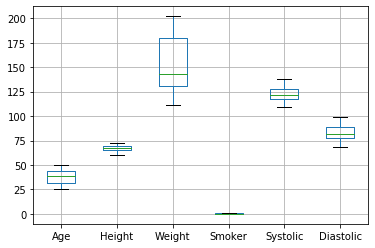

In [66]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.boxplot()

#''' To look at just one column/feature '''
#xf = pd.DataFrame(df['Age'])
#xf.boxplot()
#df['Smoker'].boxplot()


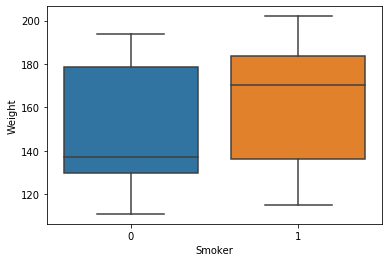

In [67]:
#sns.boxplot(x="species", y="sepal_length", data=data) # Iris Data Set
sns.boxplot(x='Smoker', y='Weight', data=df)

In [68]:
groupdf = df.groupby('Gender') #group the data according to country
#groupdf.describe()
groupdf['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,53.0,65.150943,2.151888,60.0,64.0,65.0,66.0,70.0
Male,47.0,69.234043,1.747206,66.0,68.0,69.0,71.0,72.0


# Correlation

                Age    Height    Weight    Smoker  Systolic  Diastolic
Age        1.000000  0.116002  0.091356  0.060220  0.134127   0.080597
Height     0.116002  1.000000  0.695970  0.199114  0.214076   0.156819
Weight     0.091356  0.695970  1.000000  0.215586  0.155788   0.222687
Smoker     0.060220  0.199114  0.215586  1.000000  0.706323   0.723365
Systolic   0.134127  0.214076  0.155788  0.706323  1.000000   0.511843
Diastolic  0.080597  0.156819  0.222687  0.723365  0.511843   1.000000


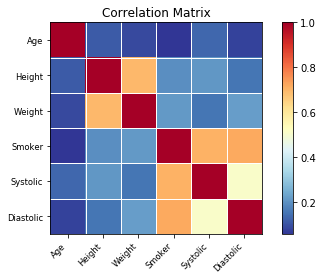

In [69]:
from statsmodels import api as sm
#Tests correlation of each column by each column 0 = No correlation, 1 = Full Correlation
corr = df.corr()
print(corr)
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

# Scatter Plot

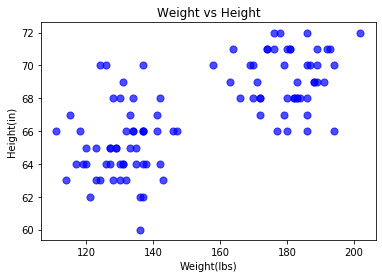

In [70]:
plt.scatter(df['Weight'],df['Height'], marker='o', color='b', alpha=0.7, s = 50)
plt.title("Weight vs Height")
plt.ylabel("Height(in)")
plt.xlabel("Weight(lbs)")
plt.show()

# Normal Distribution

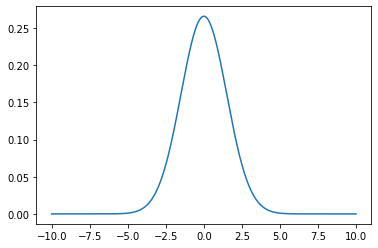

In [71]:
import pylab
from scipy.stats import norm

x = np.linspace(-10,10,1000)
y = norm.pdf(x, loc=0, scale=1.5)
matplotlib.pyplot.plot(x,y)

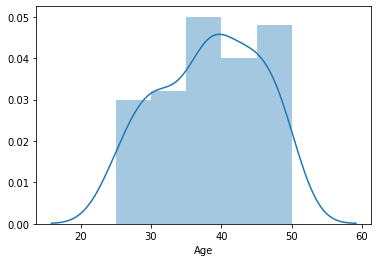

In [72]:
sns.distplot(df['Age'])

In [73]:
from scipy.stats import skewnorm

def skewed(a):
    fig, ax = plt.subplots(1, 1)
    r = skewnorm.rvs(a, size=1000)
    ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.show()


# Skewed Distributions (Right-skew and Left-skew

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
No handles with labels found to put in legend.


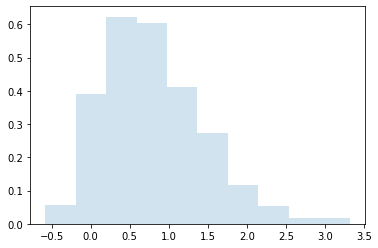

No handles with labels found to put in legend.


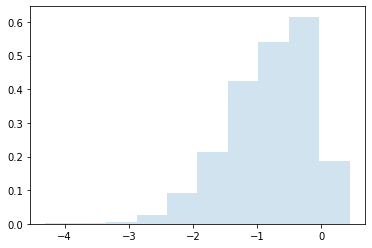

In [74]:
'''Skewed(a), if a+  skewed left, if -a '''
skewed(4)
skewed(-4)

# Histograms

Shapiro results show (Test Statistic, p-value)
        results of df['Age'] (0.953873336315155, 0.0015064007602632046)


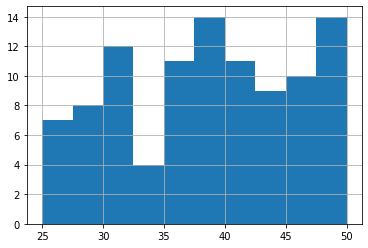

In [75]:
#df.hist()
age = df['Age']
age.hist() # Show the spread of the data
shapiro_results = scipy.stats.shapiro(age)
print('Shapiro results show (Test Statistic, p-value)') # below 0.05 if normally distributed
print("        results of df['Age']",shapiro_results)

# Z-Score 

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)

def standardize(x, mean, stdev):
    '''Calculate the z score'''
    z_score = (x - mean) / stdev #compute z score
    z = 'The z-score for x = {}, mean = {}, std = {} is {}'.format(x, mean, stdev, z_score)
    return z

In [77]:
print('''Women's Height Z-Score''')
print('-'*100)
print(standardize(75,65.15, 2.15))
print(standardize(70,65.15, 2.15))
print(standardize(65,65.15, 2.15))
print(standardize(60,65.15, 2.15))
print(standardize(55,65.15, 2.15))

Women's Height Z-Score
----------------------------------------------------------------------------------------------------
The z-score for x = 75, mean = 65.15, std = 2.15 is 4.581395348837207
The z-score for x = 70, mean = 65.15, std = 2.15 is 2.2558139534883694
The z-score for x = 65, mean = 65.15, std = 2.15 is -0.06976744186046777
The z-score for x = 60, mean = 65.15, std = 2.15 is -2.3953488372093052
The z-score for x = 55, mean = 65.15, std = 2.15 is -4.720930232558143


In [78]:
'''REMOVE'''

#Creating a random assortment of numbers in Pandas
import scipy.stats as st
rand_df = pd.DataFrame(np.random.randint(100, 200, size=(1000, 3)), columns=['A', 'B', 'C'])
print(rand_df.mean())
print(rand_df.std())

x = 0
for i in rand_df.mean():
    x += i
print(x/len(rand_df.mean()))
from scipy.stats import zscore
print('Z-Score: from rand_df.apply(zscore)\n',rand_df.apply(zscore))


A    151.495
B    151.024
C    150.822
dtype: float64
A    28.839794
B    28.579122
C    28.737295
dtype: float64
151.11366666666666
Z-Score: from rand_df.apply(zscore)
             A         B         C
0   -0.849772  0.419257  1.363998
1    0.607278 -0.210889 -1.734573
2    0.746044 -1.471180  0.389167
3    0.676661  0.979386  0.110643
4    0.746044  0.279225  0.249905
..        ...       ...       ...
995  0.433819 -0.665994 -1.734573
996 -0.711006  1.679548 -0.864188
997 -0.953847 -0.105864  1.538075
998 -1.057922  1.364475 -1.247157
999  1.648027 -1.121099  0.702505

[1000 rows x 3 columns]


# Confidence Intervals

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [80]:
# Poisson is a distribution type, randomly create population weight dta for 150k people
np.random.seed(10)
population_wt = stats.poisson.rvs(loc=18, mu=35, size=150000)

# Get a sample out of the population you just made
sample_size = 1000
sample = np.random.choice(a = population_wt, size = sample_size)
sample_mean, sample_std = sample.mean(), sample.std()

# Z-Value
z_critical = stats.norm.ppf(q = 0.975)  # Z-Critical should be 1.96 @ 95%
pop_stdev = population_wt.std()  # Get the population standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) # Calculate margin of error from stdev/sqrt(n)

# Calculate confidence interval with mean and margin or error
confidence_interval = (round(sample_mean - margin_of_error, 2),
                       round(sample_mean + margin_of_error, 2))

print("z-critical value:\n{}\nConfidence interval:\n{}\nMean:\n{}".format(
                    round(z_critical,6), confidence_interval, sample_mean)) # Check the z-critical value

z-critical value:
1.959964
Confidence interval:
(52.67, 53.4)
Mean:
53.033


# T-Test (n<30)

In [81]:
'''t-Test:
       - for small data sets (less than 30)
       - symetrical across the mean
       - bell shaped curve and fat tails
'''
from scipy.stats import sem, t # sem is Standard Error Method, t-tests

def t_test(confidence, data_points):
    t_example_data = np.array(np.random.rand(data_points,1)) # 
    n = len(t_example_data)
    mean = t_example_data.sum()/len(t_example_data)
    std_err = sem(t_example_data) #standard error
    MoE = std_err * t.ppf((1 + confidence) / 2, n - 1) # Margin of error
    start, end = mean - MoE, mean + MoE
    print('Mean = {} (n={}, margin of error = {}\nStart = {}\nEnd = {}'.format(mean, n, MoE, start, end))

t_test(0.95, 25) # 95% confidence, 25 data points

Mean = 0.5045124846206273 (n=25, margin of error = [0.12820277]
Start = [0.37630972]
End = [0.63271525]


# Line plot

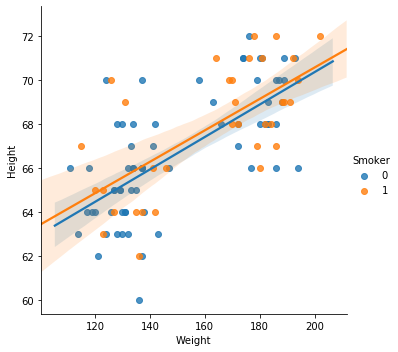

In [82]:
sns.lmplot(x='Weight',y='Height',data=df,hue='Smoker')


# Pair Plot (every permutation and distribution)

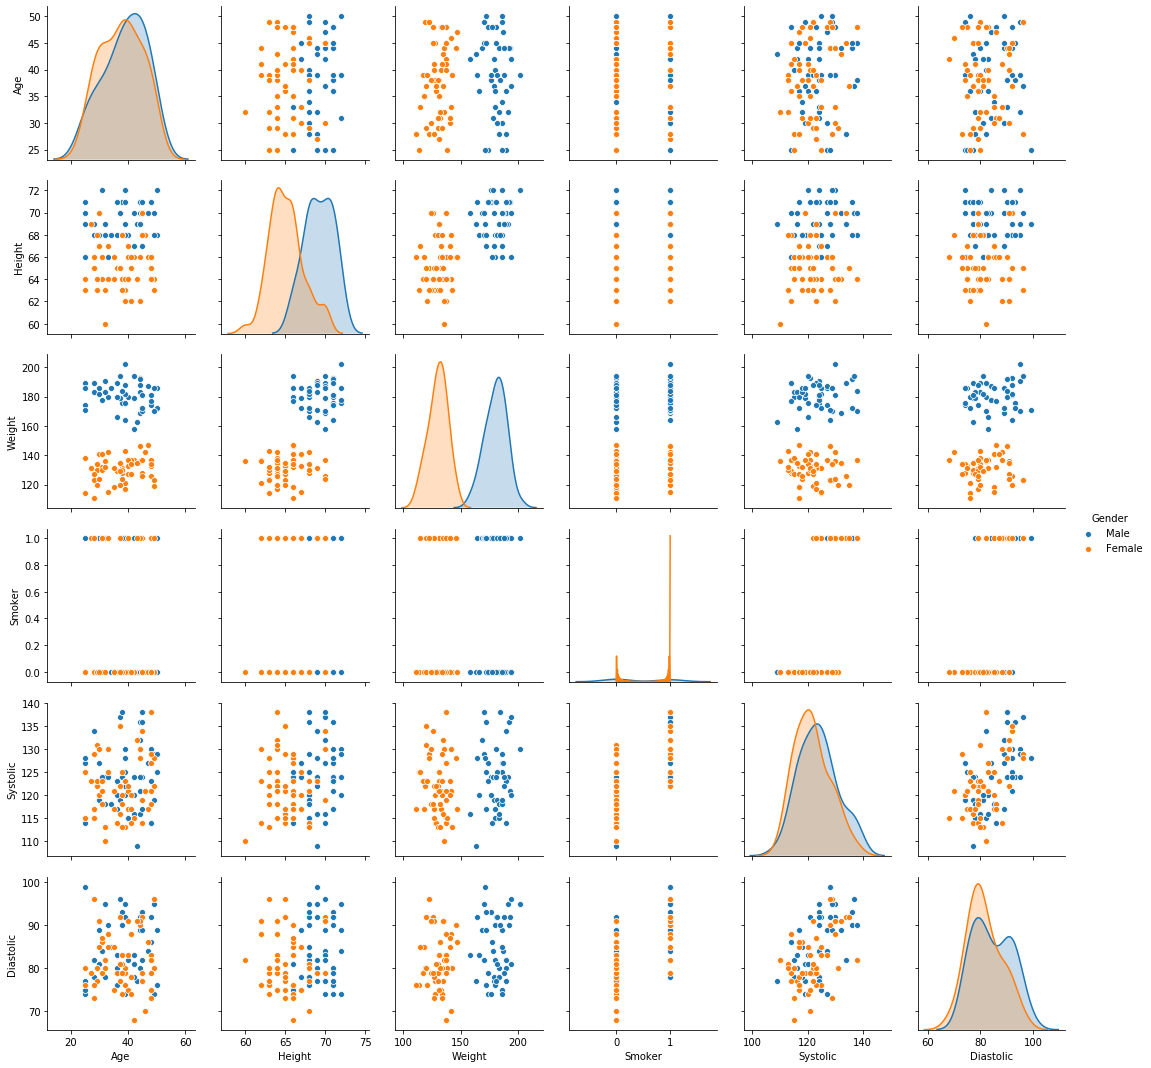

In [85]:
sns.pairplot(df, hue='Gender')

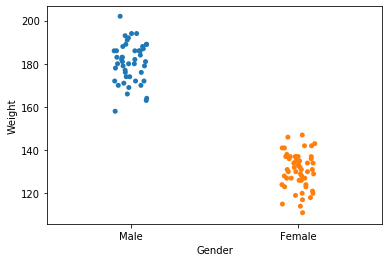

In [86]:
sns.stripplot(x="Gender", y="Weight", data=df,jitter=True)

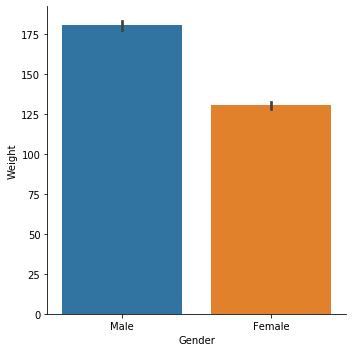

In [87]:
sns.catplot(x='Gender',y='Weight',data=df,kind='bar')

# Linear Regression and Best Fit

In [91]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [97]:
model = ols('Cholestorol ~ Age', data=df2).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:            Cholestorol   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     12.76
Date:                Mon, 10 Aug 2020   Prob (F-statistic):            0.00384
Time:                        14:16:07   Log-Likelihood:                -60.358
No. Observations:                  14   AIC:                             124.7
Df Residuals:                      12   BIC:                             126.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.3537     17.284      8.757      0.0

In [98]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cholestorol   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     12.76
Date:                Mon, 10 Aug 2020   Prob (F-statistic):            0.00384
Time:                        14:16:07   Log-Likelihood:                -60.358
No. Observations:                  14   AIC:                             124.7
Df Residuals:                      12   BIC:                             126.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.3537     17.284      8.757      0.000     113.696     189.012
Age            1.3991      0.392      3.571      0.004       0.546       2.253
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.394
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.719
Skew:                           0.347   Prob(JB):                        0.698
Kurtosis:                       2.133   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""